Logistic regression for numerical and categorical input variables



In [1]:
df <- read.table('lowbwt.dat', header=TRUE)
#lowercase the col names
names(df) <- tolower(names(df))
# Check the data
head(df,3)
# Check the dim
dim(df)

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,85,0,19,182,2,0,0,0,1,0,2523
2,86,0,33,155,3,0,0,0,0,3,2551
3,87,0,20,105,1,1,0,0,0,1,2557


[1] 189  11

In [2]:
# See the structure of the dataset
str(df)
# R believes everything is a variable. race shouldnt be an int
# See summary
summary(df)
df <- df[,-c(1,11)]

'data.frame':	189 obs. of  11 variables:
 $ id   : int  85 86 87 88 89 91 92 93 94 95 ...
 $ low  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : int  2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: int  0 0 1 1 1 0 0 0 1 1 ...
 $ ptl  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ui   : int  1 0 0 1 1 0 0 0 0 0 ...
 $ ftv  : int  0 3 1 2 0 0 1 1 1 0 ...
 $ bwt  : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...


       id             low              age             lwt       
 Min.   :  4.0   Min.   :0.0000   Min.   :14.00   Min.   : 80.0  
 1st Qu.: 68.0   1st Qu.:0.0000   1st Qu.:19.00   1st Qu.:110.0  
 Median :123.0   Median :0.0000   Median :23.00   Median :121.0  
 Mean   :121.1   Mean   :0.3122   Mean   :23.24   Mean   :129.8  
 3rd Qu.:176.0   3rd Qu.:1.0000   3rd Qu.:26.00   3rd Qu.:140.0  
 Max.   :226.0   Max.   :1.0000   Max.   :45.00   Max.   :250.0  
      race           smoke             ptl               ht         
 Min.   :1.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :1.000   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   :1.847   Mean   :0.3915   Mean   :0.1958   Mean   :0.06349  
 3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :3.000   Max.   :1.0000   Max.   :3.0000   Max.   :1.00000  
       ui              ftv              bwt      
 Min.

In [3]:
df <- within(df, {race.cat=factor(race, 
                                 levels=1:3, 
                                 labels=c("White", "AA", "Other"))
                 ftv.cat=cut(ftv,
                               breaks=c(-Inf,0,2,Inf),
                               labels=c("None", "Normal", "Many"))
                 ptl.cat=factor(ptl>=1, 
                               levels=c(F,T),
                               labels=c("0", "1+"))
                race=NULL
                ftv=NULL
                ptl=NULL
                })

The variable low is the low birthweight staus. This will be our outcome variable in logreg.

In [4]:
head(df)

,low,age,lwt,smoke,ht,ui,ptl.cat,ftv.cat,race.cat
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,0,19,182,0,0,1,0,None,AA
2,0,33,155,0,0,0,0,Many,Other
3,0,20,105,1,0,0,0,Normal,White
4,0,21,108,1,0,1,0,Normal,White
5,0,18,107,1,0,1,0,None,White
6,0,21,124,0,0,0,0,None,Other


No matter what regression youre using, its almost the same guidelines for preprocessing the data. decalring categorical, labeling levels, cutting first trim into 3 factor groups. after we create the categorical versions we removed the original ones. 

instead of lm for linear model, its glm for generalized linear model.

glm has a transformation of expected value of the outcome variables***

in linear regression the transformation is the identity trans, in logreg its the logit transformation. you can fit linreg with glm as well. the default is linreg. 

Remember our outcome variable is "low"

Lets start with age:


In [5]:
summary(glm(low~age, data=df)) # default linear reg


Call:
glm(formula = low ~ age, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4085  -0.3355  -0.2625   0.6332   0.8001  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.554521   0.151724   3.655 0.000334 ***
age         -0.010429   0.006367  -1.638 0.103083    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2139461)

    Null deviance: 40.582  on 188  degrees of freedom
Residual deviance: 40.008  on 187  degrees of freedom
AIC: 248.9

Number of Fisher Scoring iterations: 2


In [6]:
# Tell R to fit logistic regression
summary(glm(low~age, data=df, family = binomial))


Call:
glm(formula = low ~ age, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0402  -0.9018  -0.7754   1.4119   1.7800  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.38458    0.73212   0.525    0.599
age         -0.05115    0.03151  -1.623    0.105

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 231.91  on 187  degrees of freedom
AIC: 235.91

Number of Fisher Scoring iterations: 4


First what we see if the p value is .1, def not sig, as evidenced by lack of stars. 
if we were forced to give interpretation to age coef, we woud say:

probability of low birthweight given 0 age is .38
for a person who is one year older than the other person,

Age is bad, will give lower odds of having low birthweight baby 

effect of age on low birthweight:

each year of age, decreases the odds of having a low birthweight baby by 5%. 

But this is not significant so well keep looking. 


In [7]:
exp(-0.05115)

[1] 0.9501361

Small trick: e^small ~ 1+small
follows from taylor expansion of e^power

Remember lwt is the weight of mom before preggo.

This looks significant:

In [8]:
# Tell R to fit logistic regression
summary(glm(low~lwt, data=df, family = binomial))


Call:
glm(formula = low ~ lwt, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0951  -0.9022  -0.8018   1.3609   1.9821  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.99831    0.78529   1.271   0.2036  
lwt         -0.01406    0.00617  -2.279   0.0227 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 228.69  on 187  degrees of freedom
AIC: 232.69

Number of Fisher Scoring iterations: 4


interpretation of lwt:

adds decreases by 1.4% every unit pound increase of lwt 

In [9]:
exp(-0.01406)

[1] 0.9860384

There is no unit un the outcome variable in logreg. now it is just lowered probability or not.

For each addition unit pound in weight of the mum (lwt) decreases the odds of having a low birthweight baby by 1.4%. **** 

In [10]:
summary(glm(low~smoke, data=df, family = binomial))


Call:
glm(formula = low ~ smoke, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0197  -0.7623  -0.7623   1.3438   1.6599  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0871     0.2147  -5.062 4.14e-07 ***
smoke         0.7041     0.3196   2.203   0.0276 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 229.80  on 187  degrees of freedom
AIC: 233.8

Number of Fisher Scoring iterations: 4


Can pretend smoking 0,1 is contunious
R makes it a dummy variable so it will be the same thing
Output will look slightly different.

(70 min**) 

One unit increase in smoking will be the right interpretaiton

For every 1 unit increase in smoking, the odds of having a low birthweight baby inrease by 102%
(doubles)

In [11]:
exp(.7041)

[1] 2.022026

In [12]:
summary(glm(low~factor(ht), data=df, family = binomial))


Call:
glm(formula = low ~ factor(ht), family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3232  -0.8341  -0.8341   1.5652   1.5652  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8771     0.1650  -5.315 1.07e-07 ***
factor(ht)1   1.2135     0.6083   1.995   0.0461 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 230.65  on 187  degrees of freedom
AIC: 234.65

Number of Fisher Scoring iterations: 4


People with hypertension are 3.36x more likely to have a low birthweight baby than those without,
or there is a 236% increase in the odds attributable to hypertension. 

In [13]:
exp(1.2135)*100

[1] 336.5242

In [14]:
summary(glm(low~factor(ui), data=df, family = binomial))


Call:
glm(formula = low ~ factor(ui), family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1774  -0.8097  -0.8097   1.1774   1.5967  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9469     0.1756  -5.392 6.97e-08 ***
factor(ui)1   0.9469     0.4168   2.272   0.0231 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 229.60  on 187  degrees of freedom
AIC: 233.6

Number of Fisher Scoring iterations: 4


This condition is associated with 157% increase in odds compared to those who dont have it. 2.57x increase. 

In [15]:
summary(glm(low~race.cat, data=df, family = binomial))


Call:
glm(formula = low ~ race.cat, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0489  -0.9665  -0.7401   1.4042   1.6905  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.1550     0.2391  -4.830 1.36e-06 ***
race.catAA      0.8448     0.4634   1.823   0.0683 .  
race.catOther   0.6362     0.3478   1.829   0.0674 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 229.66  on 186  degrees of freedom
AIC: 235.66

Number of Fisher Scoring iterations: 4


In [16]:
exp(.8448)

[1] 2.327512

In [17]:
exp(.6362)

[1] 1.889288

These are odds ratios and the baseline category is caucasian. 

Compared to whites, AA mothers have an extra 132% increase in the odds of having a low birthweight baby.

Compared to whites, Other-race mothers have an extra 89% increase in the odds of having a low birthweight baby.

Both are not quite significant but pretty close, so possibly when we ftr the model with other variables this might push it into significance, so we have to be prepared to look at this variable. 

### Model evaluation

Sensitivity, specificity, F1, AUROC, and finding threshold for optimal sensitivity and specificity 


In [18]:
library(MASS)
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [54]:
# Lets build automatically
base = glm(low~., data=df, family=binomial)

In [53]:
final1 = stepAIC(base)

Start:  AIC=22
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + race.cat

           Df   Deviance AIC
- ftv.cat   2 5.8016e-10  18
- race.cat  2 5.8016e-10  18
- age       1 5.8016e-10  20
- lwt       1 5.8016e-10  20
- smoke     1 5.8016e-10  20
- ht        1 5.8016e-10  20
- ui        1 5.8016e-10  20
- ptl.cat   1 5.8016e-10  20
<none>        5.8016e-10  22

Step:  AIC=18
low ~ age + lwt + smoke + ht + ui + ptl.cat + race.cat

           Df   Deviance AIC
- race.cat  2 5.8016e-10  14
- age       1 5.8016e-10  16
- lwt       1 5.8016e-10  16
- smoke     1 5.8016e-10  16
- ht        1 5.8016e-10  16
- ui        1 5.8016e-10  16
- ptl.cat   1 5.8016e-10  16
<none>        5.8016e-10  18

Step:  AIC=14
low ~ age + lwt + smoke + ht + ui + ptl.cat

          Df   Deviance AIC
- age      1 5.8016e-10  12
- lwt      1 5.8016e-10  12
- smoke    1 5.8016e-10  12
- ht       1 5.8016e-10  12
- ui       1 5.8016e-10  12
- ptl.cat  1 5.8016e-10  12
<none>       5.8016e-10  14

Step:  AIC=1

In [21]:
summary(final1)


Call:
glm(formula = low ~ lwt + smoke + ht + ui + ptl.cat + race.cat, 
    family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7308  -0.7841  -0.5144   0.9539   2.1980  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)   -0.125326   0.967561  -0.130  0.89694   
lwt           -0.015918   0.006954  -2.289  0.02207 * 
smoke          0.866582   0.404469   2.143  0.03215 * 
ht             1.866895   0.707373   2.639  0.00831 **
ui             0.750649   0.458815   1.636  0.10183   
ptl.cat1+      1.128857   0.450388   2.506  0.01220 * 
race.catAA     1.300856   0.528484   2.461  0.01384 * 
race.catOther  0.854414   0.440907   1.938  0.05264 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 197.85  on 181  degrees of freedom
AIC: 213.85

Number of Fisher Scorin

We built a best AIC-minimized logreg model using all the variables. 

Here the ui variable is not significant, so we can decide if we want to keep. We'll keep it for today.

Anyway, is this  good model? Lets fund the AUROC

Before we do this, we need to get the model-predicted probabilities for each person. 



In [22]:
low2=predict(final1, type="response") # predict on the probability scale, type="response"

In [23]:
# These are the model predicted probabilities
# These are the guys we will slice with the thresholds
# To do the ROC 
low2

1          2          3          4          5          6          7 
0.27468446 0.14953213 0.28288739 0.44342072 0.44735284 0.22360113 0.11881437 
         8          9         10         11         12         13         14 
0.28689453 0.22851480 0.25778142 0.31363775 0.15993888 0.74719890 0.71204089 
        15         16         17         18         19         20         21 
0.29930877 0.29930877 0.40504665 0.24284877 0.39401174 0.23704283 0.23200092 
        22         23         24         25         26         27         28 
0.27557376 0.03419582 0.23484931 0.39401174 0.05821077 0.23133328 0.07494511 
        29         30         31         32         33         34         35 
0.34701365 0.34904086 0.34904086 0.60765119 0.77640411 0.06961040 0.30697930 
        36         37         38         39         40         41         42 
0.18432274 0.18915753 0.22572058 0.06409089 0.27015075 0.28847417 0.04172967 
        43         44         45         46         47         48         49 
0.29031144 0.06462889 0.51480615 0.51480615 0.09739021 0.20227264 0.12390596 
        50         51         52         53         54         55         56 
0.56035420 0.45793774 0.21274189 0.20946623 0.31626299 0.24945214 0.26464891 
        57         58         59         60         61         62         63 
0.64457722 0.15362625 0.28689453 0.23772185 0.23772185 0.23772185 0.26464891 
        64         65         66         67         68         69         70 
0.08675530 0.64734053 0.47960419 0.24945214 0.08440492 0.37981690 0.44751096 
        71         72         73         74         75         76         77 
0.52179701 0.31171770 0.44153010 0.35266636 0.19659105 0.07800256 0.08675530 
        78         79         80         81         82         83         84 
0.43463545 0.52896159 0.04109774 0.09879853 0.05564728 0.26464891 0.21542015 
        85         86         87         88         89         90         91 
0.22637679 0.42200528 0.28042557 0.10022495 0.05160958 0.10763443 0.09599984 
        92         93         94         95         96         97         98 
0.19718414 0.24366496 0.75185051 0.19659105 0.09327222 0.07064844 0.16815501 
        99        100        101        102        103        104        105 
0.16815501 0.09061433 0.13280774 0.42046906 0.52670273 0.13280774 0.23484931 
       106        107        108        109        110        111        112 
0.31132603 0.12918376 0.05648974 0.23704283 0.17790432 0.04368167 0.23484931 
       113        114        115        116        117        118        119 
0.20946623 0.22493443 0.12293938 0.19718414 0.09327222 0.20745851 0.11552136 
       120        121        122        123        124        125        126 
0.31363775 0.06658038 0.13968993 0.12390596 0.10166964 0.10022495 0.11552136 
       127        128        129        130        131        132        133 
0.15412469 0.23704283 0.12218828 0.11073077 0.82706372 0.19091451 0.71753198 
       134        135        136        137        138        139        140 
0.88629075 0.53162439 0.15993888 0.48391679 0.56631245 0.62122356 0.49540085 
       141        142        143        144        145        146        147 
0.28288739 0.76353885 0.24945214 0.20745851 0.32667907 0.16158047 0.22140174 
       148        149        150        151        152        153        154 
0.35497286 0.28689453 0.37517658 0.60854507 0.14817206 0.42776776 0.50191273 
       155        156        157        158        159        160        161 
0.08931111 0.80309850 0.53292594 0.63445097 0.46425530 0.74513679 0.26702362 
       162        163        164        165        166        167        168 
0.54649156 0.26775838 0.16426289 0.80532838 0.66699518 0.56613456 0.31022120 
       169        170        171        172        173        174        175 
0.56129713 0.13280774 0.28198368 0.52499357 0.59162129 0.41316721 0.23484931 
       176        177        178        179        180        181        182 
0.40364246 0.20946623 0.2370428

This can be done automatically 

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$low, predictor = low2, plot = T)

Data: low2 in 130 controls (df$low 0) < 59 cases (df$low 1).
Area under the curve: 0.758

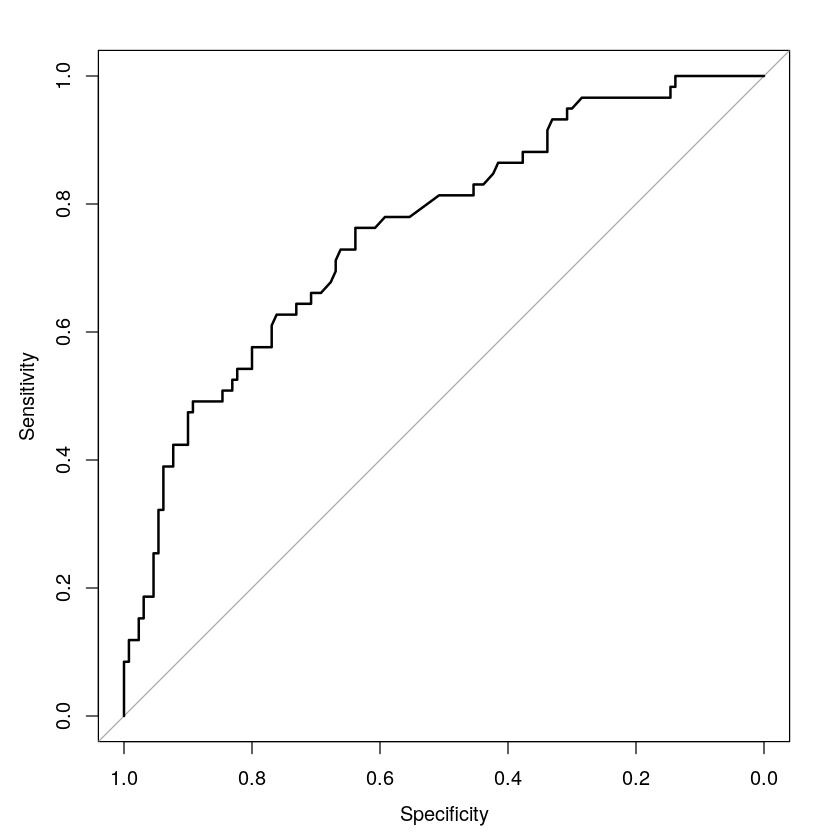

In [24]:
roc(df$low, low2, plot=T)

Usually the x axis is 1-specificity. R orders it in the opposite direction. 

Lets give interpretation to our optimal model.


In [25]:
summary(final1)$coef[,1] # Grab the coefs then grab the effect
# sizes and exponentiate them all at once
# Remember when we give interpretation of logreg
# coefs we always exponentiate it. cuz these have
# interpretation in terms of logs ratio.

exp(summary(final1)$coef[,1])

(Intercept)           lwt         smoke            ht            ui 
  -0.12532604   -0.01591847    0.86658183    1.86689526    0.75064880 
    ptl.cat1+    race.catAA race.catOther 
   1.12885661    1.30085571    0.85441418

(Intercept)           lwt         smoke            ht            ui 
    0.8822092     0.9842076     2.3787659     6.4681832     2.1183740 
    ptl.cat1+    race.catAA race.catOther 
    3.0921190     3.6724379     2.3499973

In [26]:
exp(summary(final1)$coef[,1])

(Intercept)           lwt         smoke            ht            ui 
    0.8822092     0.9842076     2.3787659     6.4681832     2.1183740 
    ptl.cat1+    race.catAA race.catOther 
    3.0921190     3.6724379     2.3499973

.88 to 1 odds, would be the odds ratio for the mom to have low birthweight child if she was white, didnt smoke, no hypertension, no ui, no preterm labor events, and a 0 pound mom
Odds is probability of having it vs the odds she doesnt.

lwt: weight of mum
for every pound, each pound of weight reduces the odds of low birth weight by 1.5 % 

odds of having a lbwt baby is 137% higher for smokers vs non smokers

for ui its 111% increase
ptl events odds increases more than 3 fold
aa mothers is 267% higher compared to caucasian mothers

for other mothers its 135% highger compared to caucasian mothers.

In [27]:
# type = response is syaing do it on the probability 
# scale, not the log-odds scale
# Look up log-odds scale

Can we make the model better?

Finding the closest point to the upper LHS corner. Can be done with a package or yourself. 

He wants us to do it ourselves and compare with package.

Building a model with interactions, lets see how much AUC would improve.

In [28]:
final2 = stepAIC(base,~.^2) #model w interactions

Start:  AIC=217.5
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + race.cat

                   Df Deviance    AIC
+ age:ftv.cat       2   184.47 210.47
- ftv.cat           2   196.83 214.83
- age               1   196.37 216.37
<none>                  195.50 217.50
+ smoke:ui          1   193.86 217.86
- ui                1   197.90 217.90
+ lwt:smoke         1   194.10 218.10
+ lwt:ui            1   194.18 218.18
+ ui:ptl.cat        1   194.31 218.31
+ ui:race.cat       2   192.43 218.43
+ age:ptl.cat       1   194.51 218.51
+ ht:ptl.cat        1   194.54 218.54
+ age:ht            1   194.60 218.60
+ age:smoke         1   194.62 218.62
- smoke             1   198.82 218.82
+ lwt:ftv.cat       2   193.10 219.10
+ smoke:ht          1   195.16 219.16
+ smoke:ptl.cat     1   195.23 219.23
+ smoke:race.cat    2   193.28 219.28
- race.cat          2   201.29 219.29
+ lwt:ptl.cat       1   195.38 219.38
+ lwt:ht            1   195.47 219.47
+ age:lwt           1   195.50 219.50
+ ag

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                   Df Deviance    AIC
+ lwt:ftv.cat       2   177.47 207.47
+ smoke:ui          1   181.86 209.86
+ ui:ptl.cat        1   181.95 209.95
+ lwt:smoke         1   182.25 210.25
- race.cat          2   188.29 210.29
<none>                  184.47 210.47
+ lwt:ui            1   183.30 211.30
+ ht:ptl.cat        1   183.35 211.35
+ ui:race.cat       2   181.48 211.48
+ age:smoke         1   183.66 211.66
- smoke             1   187.86 211.86
- ui                1   187.91 211.91
+ smoke:ptl.cat     1   184.14 212.14
+ age:ptl.cat       1   184.25 212.25
+ lwt:ptl.cat       1   184.26 212.26
+ smoke:ht          1   184.33 212.33
+ age:ht            1   184.34 212.34
+ age:ui            1   184.46 212.46
+ lwt:ht            1   184.47 212.47
+ age:lwt           1   184.47 212.47
+ smoke:race.cat    2   182.64 212.64
+ age:race.cat      2   183.00 213.00
+ smoke:ftv.cat     2   183.50 213.50
+ ht:ftv.cat        2   183.62 213.62
- lwt               1   189.85 213.85
+ lwt:race.c

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=207.47
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + race.cat + 
    age:ftv.cat + lwt:ftv.cat



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                   Df Deviance    AIC
+ ui:ptl.cat        1   174.81 206.81
- race.cat          2   181.11 207.11
+ smoke:ui          1   175.14 207.14
<none>                  177.47 207.47
+ lwt:smoke         1   175.62 207.62
+ age:smoke         1   175.92 207.92
- smoke             1   180.01 208.01
+ ht:ptl.cat        1   176.39 208.39
- ui                1   180.64 208.64
+ smoke:ptl.cat     1   176.69 208.69
+ lwt:ptl.cat       1   176.89 208.89
+ lwt:ui            1   176.94 208.94
+ ui:race.cat       2   175.08 209.08
+ age:ht            1   177.29 209.29
+ age:lwt           1   177.32 209.32
+ smoke:ht          1   177.40 209.40
+ age:ptl.cat       1   177.40 209.40
+ age:ui            1   177.40 209.40
+ lwt:ht            1   177.46 209.46
+ age:race.cat      2   175.91 209.91
+ smoke:race.cat    2   176.29 210.29
- ht                1   182.46 210.46
- lwt:ftv.cat       2   184.47 210.47
+ smoke:ftv.cat     2   176.77 210.77
+ ht:race.cat       2   176.88 210.88
+ lwt:race.c

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=206.81
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + race.cat + 
    age:ftv.cat + lwt:ftv.cat + ui:ptl.cat



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                   Df Deviance    AIC
- race.cat          2   177.56 205.56
+ lwt:smoke         1   172.65 206.65
<none>                  174.81 206.81
+ age:smoke         1   173.13 207.13
+ smoke:ui          1   173.25 207.25
- smoke             1   177.26 207.26
- ui:ptl.cat        1   177.47 207.47
+ smoke:ptl.cat     1   173.95 207.95
+ ht:ptl.cat        1   174.10 208.10
+ lwt:ui            1   174.12 208.12
+ lwt:ptl.cat       1   174.29 208.29
+ age:ptl.cat       1   174.41 208.41
+ age:ui            1   174.56 208.56
+ age:lwt           1   174.58 208.58
+ age:ht            1   174.68 208.68
+ smoke:ht          1   174.74 208.74
+ lwt:ht            1   174.80 208.80
+ ui:race.cat       2   173.45 209.45
+ age:race.cat      2   173.50 209.50
- ht                1   179.62 209.62
+ smoke:race.cat    2   173.66 209.66
- lwt:ftv.cat       2   181.95 209.95
+ smoke:ftv.cat     2   174.04 210.04
+ ht:race.cat       2   174.07 210.07
+ ptl.cat:race.cat  2   174.34 210.34
+ lwt:race.c

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=205.56
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + age:ftv.cat + 
    lwt:ftv.cat + ui:ptl.cat



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                  Df Deviance    AIC
+ lwt:smoke        1   174.85 204.85
+ age:smoke        1   174.91 204.91
- smoke            1   178.94 204.94
+ smoke:ui         1   175.53 205.53
<none>                 177.56 205.56
+ lwt:ui           1   176.44 206.44
+ race.cat         2   174.81 206.81
+ smoke:ptl.cat    1   176.85 206.85
+ ht:ptl.cat       1   176.92 206.92
+ lwt:ptl.cat      1   176.98 206.98
- ui:ptl.cat       1   181.11 207.11
+ age:ui           1   177.14 207.14
+ age:ht           1   177.19 207.19
+ age:ptl.cat      1   177.27 207.27
+ age:lwt          1   177.38 207.38
+ lwt:ht           1   177.50 207.50
+ smoke:ht         1   177.51 207.51
+ smoke:ftv.cat    2   176.65 208.65
- ht               1   182.79 208.79
- lwt:ftv.cat      2   185.00 209.00
+ ui:ftv.cat       2   177.52 209.52
+ ht:ftv.cat       2   177.55 209.55
+ ptl.cat:ftv.cat  2   177.55 209.55
- age:ftv.cat      2   197.46 221.46


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=204.85
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + age:ftv.cat + 
    lwt:ftv.cat + ui:ptl.cat + lwt:smoke



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                  Df Deviance    AIC
+ lwt:ui           1   172.71 204.71
+ age:smoke        1   172.77 204.77
<none>                 174.85 204.85
+ smoke:ui         1   173.35 205.35
- lwt:smoke        1   177.56 205.56
+ ht:ptl.cat       1   173.99 205.99
+ smoke:ptl.cat    1   174.02 206.02
+ lwt:ptl.cat      1   174.34 206.34
+ age:ht           1   174.43 206.43
+ age:ptl.cat      1   174.44 206.44
- ht               1   178.58 206.58
+ race.cat         2   172.65 206.65
+ smoke:ht         1   174.66 206.66
+ age:lwt          1   174.70 206.70
+ age:ui           1   174.70 206.70
- ui:ptl.cat       1   178.78 206.78
+ lwt:ht           1   174.84 206.84
+ smoke:ftv.cat    2   174.15 208.15
- lwt:ftv.cat      2   182.26 208.26
+ ptl.cat:ftv.cat  2   174.79 208.79
+ ht:ftv.cat       2   174.81 208.81
+ ui:ftv.cat       2   174.81 208.81
- age:ftv.cat      2   195.62 221.62


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=204.71
low ~ age + lwt + smoke + ht + ui + ptl.cat + ftv.cat + age:ftv.cat + 
    lwt:ftv.cat + ui:ptl.cat + lwt:smoke + lwt:ui



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                  Df Deviance    AIC
<none>                 172.71 204.71
- lwt:ui           1   174.85 204.85
+ age:smoke        1   171.32 205.32
+ ht:ptl.cat       1   171.63 205.63
+ smoke:ptl.cat    1   171.93 205.93
+ lwt:ptl.cat      1   172.08 206.08
+ age:ht           1   172.32 206.32
+ smoke:ui         1   172.33 206.33
+ age:ptl.cat      1   172.39 206.39
- lwt:smoke        1   176.44 206.44
+ smoke:ht         1   172.51 206.51
+ age:ui           1   172.60 206.60
+ lwt:ht           1   172.62 206.62
+ age:lwt          1   172.71 206.71
- lwt:ftv.cat      2   178.82 206.82
- ht               1   177.02 207.02
+ race.cat         2   171.10 207.10
- ui:ptl.cat       1   177.12 207.12
+ smoke:ftv.cat    2   172.13 208.13
+ ui:ftv.cat       2   172.62 208.62
+ ht:ftv.cat       2   172.65 208.65
+ ptl.cat:ftv.cat  2   172.69 208.69
- age:ftv.cat      2   192.42 220.42


In [29]:
probability_lbwt = predict(final2, type="response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$low, predictor = probability_lbwt,     plot = T)

Data: probability_lbwt in 130 controls (df$low 0) < 59 cases (df$low 1).
Area under the curve: 0.8283

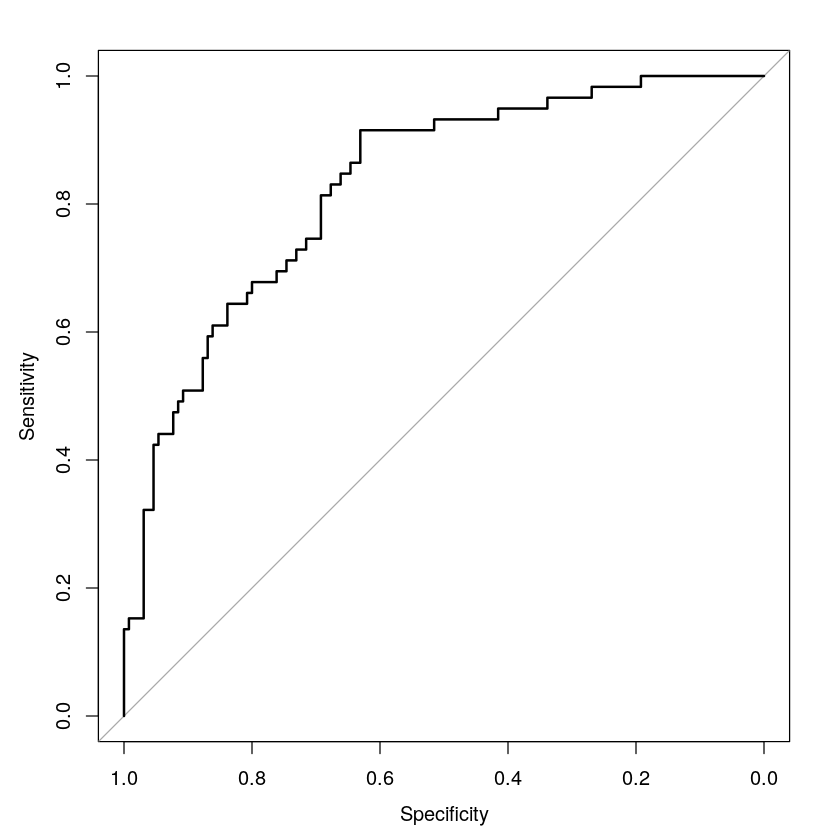

In [30]:
roc(df$low, probability_lbwt, plot=T)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



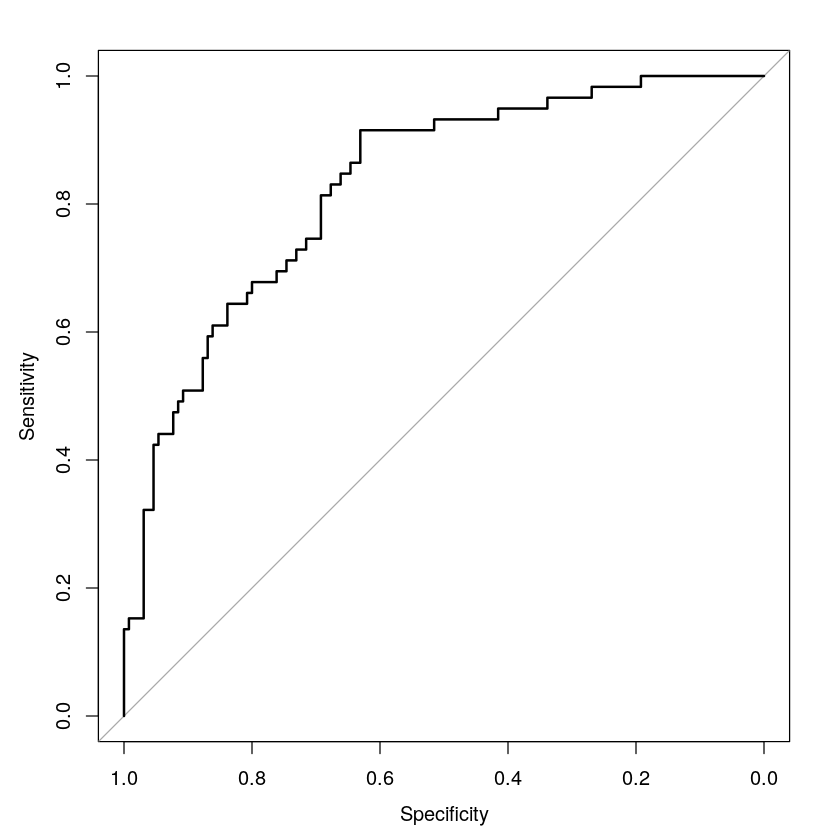

In [31]:
my_roc = roc(df$low, probability_lbwt, plot=T)

In [32]:
auc(my_roc)

Area under the curve: 0.8283

Finding the coordinates on ROC that gets optimal sensi/specif

Threshold that corresp to the point on the upper lhs has 
specif of 1 and sensi of 0. this threshold is 0. 

well do this by hand in R




### Finding the optimal threshold by balancing specificity and sensitivity

In [33]:
thetas = seq(0,1,.001)
# Model 1
sens1 = rep(0,length(thetas))
spec1 = rep(0, length(thetas))
# Model 2
sens2 = rep(0,length(thetas))
spec2 = rep(0, length(thetas))

# Distances to roc from upper lhs corner 
dist1 = rep(0,length(thetas))
dist2 = rep(0, length(thetas))

# For every threshold theta we have a corresponding sensitivity and specificity
# These will be the points on the ROC curve

# age, lwt, smoke, ht ui, ptl cat1, ftv ftv, age ftv age ftv, ui ptlcat1

# We should have the 1000 points so we can get all changes in ROC
pp1 = predict(final1, type="response")
pp2 = predict(final2, type="response") # final2 had model inxns

for (i in 1:length(thetas)) {
    # Cut the probabilities by a threshold and create a 0,1 vector
    # the predicted probs will be replaced by 0s and 1s
    # Low birthweight indicator variable at a particular threshold
    classns_at_threshold1 = as.numeric(pp1 > thetas[i]) # as numeric changes from TF to 0,1
    classns_at_threshold2 = as.numeric(pp2 > thetas[i]) # as numeric changes from TF to 0,1
    
    # How much will the optimal threshold change from a model
    # from main effects only to main+inxns
    
    # Sensitivity:
    # Remember now the sensi and spec can be calculated
    # Based on how well the 0,1s from these vectors match to the
    # True LBWT status variable, "low"
    # total # ppl that model predicts will have lbwt baby and actually have it /total number of people w lbwt babies
    # Specificity:
    # Among the people that dont have the lbwt babies, how many the model says they dont have lbwt baby
    # / total number of 0s
    
    sens1[i] =  sum(df$low*classns_at_threshold1)/sum(df$low)
    spec1[i] =  sum((1-df$low)*(1-classns_at_threshold1))/(length(thetas)-sum(df$low)) 
    sens2[i] =  sum(df$low*classns_at_threshold2)/sum(df$low)
    spec2[i] =  sum((1-df$low)*(1-classns_at_threshold2))/(length(thetas)-sum(df$low))

    # Euclidean distance
    # d(P, Ri) = sqrt((1-sens_i)^2 + (1-spec_i)^2)
    dist1[i] = sqrt((1-sens1[i])^2 + (1-spec1[i])^2)
    dist2[i] = sqrt((1-sens2[i])^2 + (1-spec2[i])^2)
    
}

In [34]:
# as.numeric(pp1 > .2)

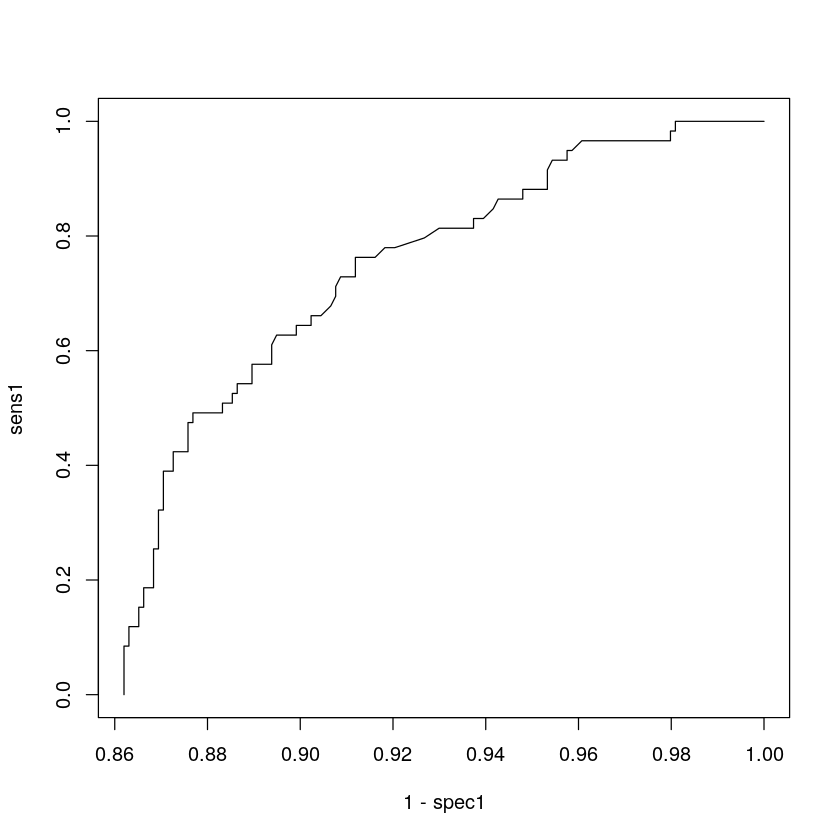

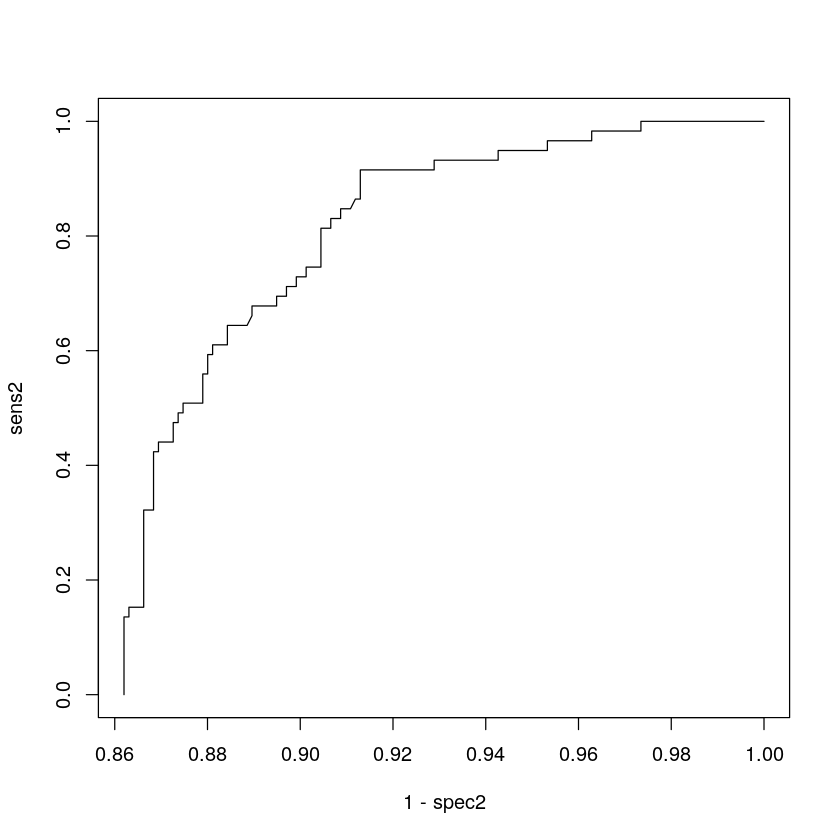

In [35]:
plot(1-spec1, sens1, type="l")
plot(1-spec2, sens2, type="l")

compare to plot from package

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$low, predictor = pp1, plot = TRUE)

Data: pp1 in 130 controls (df$low 0) < 59 cases (df$low 1).
Area under the curve: 0.758

Setting levels: control = 0, case = 1

Setting direction: controls < cases



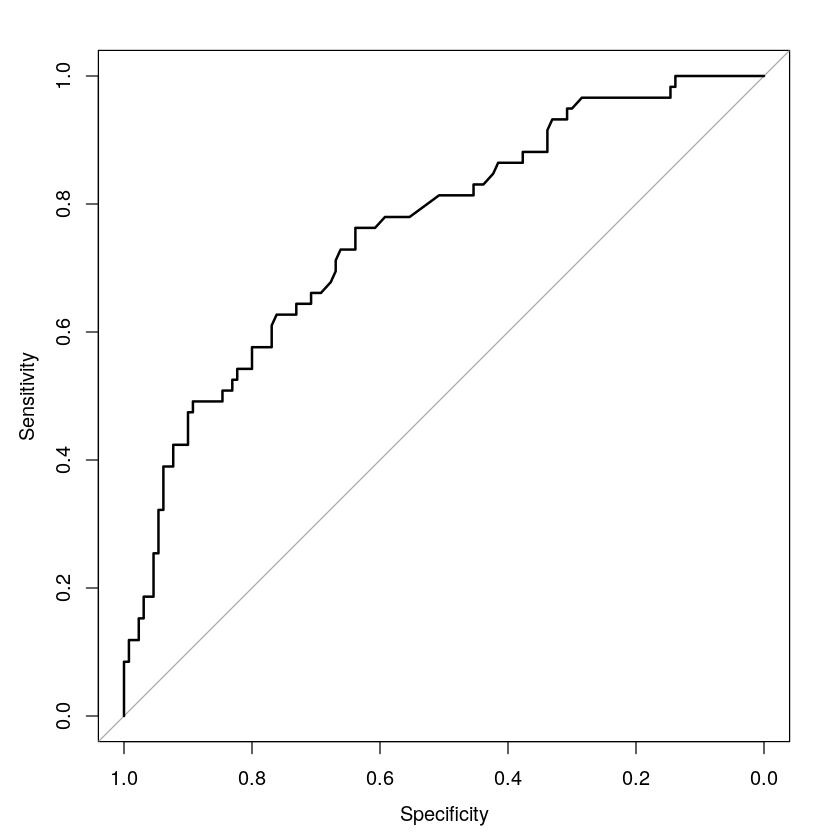


Call:
roc.default(response = df$low, predictor = pp2, plot = TRUE)

Data: pp2 in 130 controls (df$low 0) < 59 cases (df$low 1).
Area under the curve: 0.8283

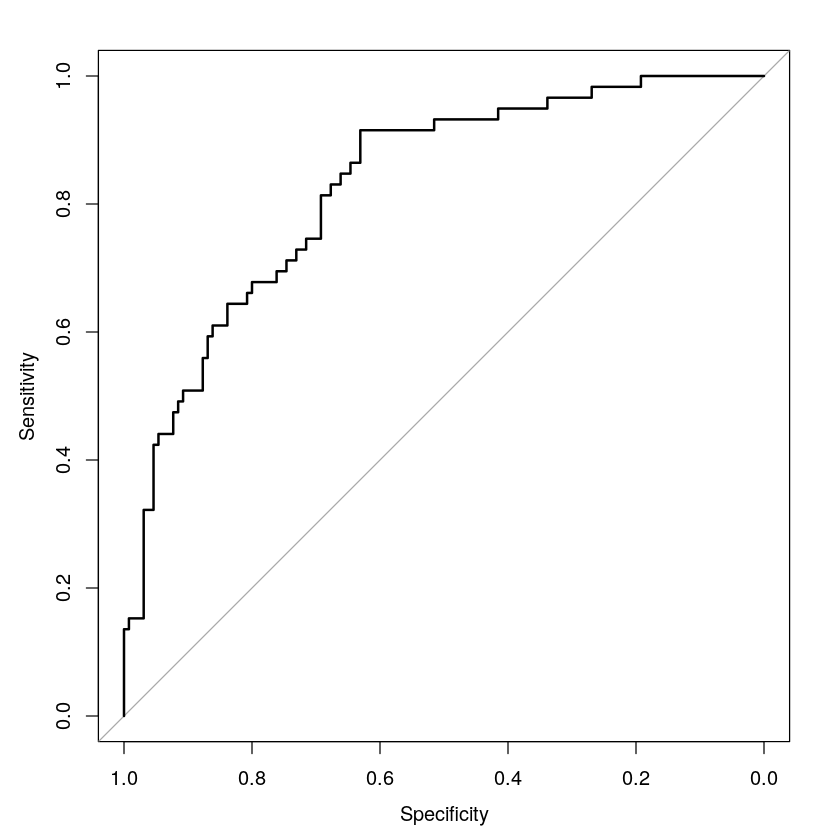

In [36]:
roc(df$low, pp1, plot=TRUE)
roc(df$low, pp2, plot=TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$low, predictor = pp1, plot = TRUE)

Data: pp1 in 130 controls (df$low 0) < 59 cases (df$low 1).
Area under the curve: 0.758

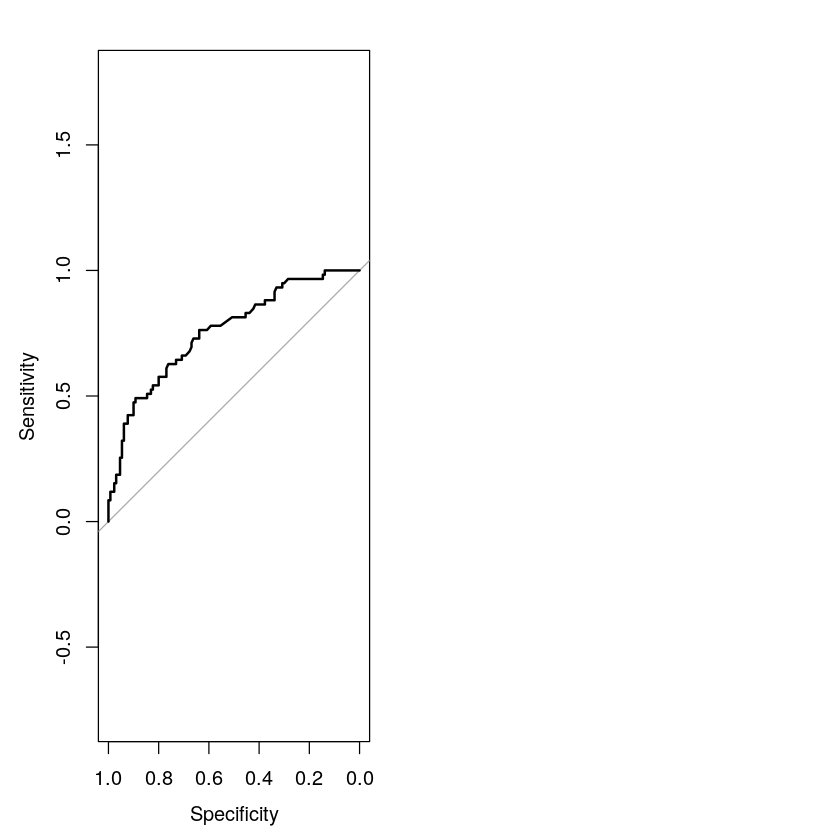

In [37]:
par(mfrow=c(1,2))
roc(df$low, pp1, plot=TRUE)

how can we find the minimum distance?

In [38]:
which.min(dist1) # 282
# 282nd point on our graph as the minimum distance
# Which theshold theta that produced it? 
# Since we went from 0-1 it should be .82

[1] 266

In [39]:
which.min(dist2) # 371

[1] 219

In [40]:
# Lets emphasize this point with a special symbol on the plot 

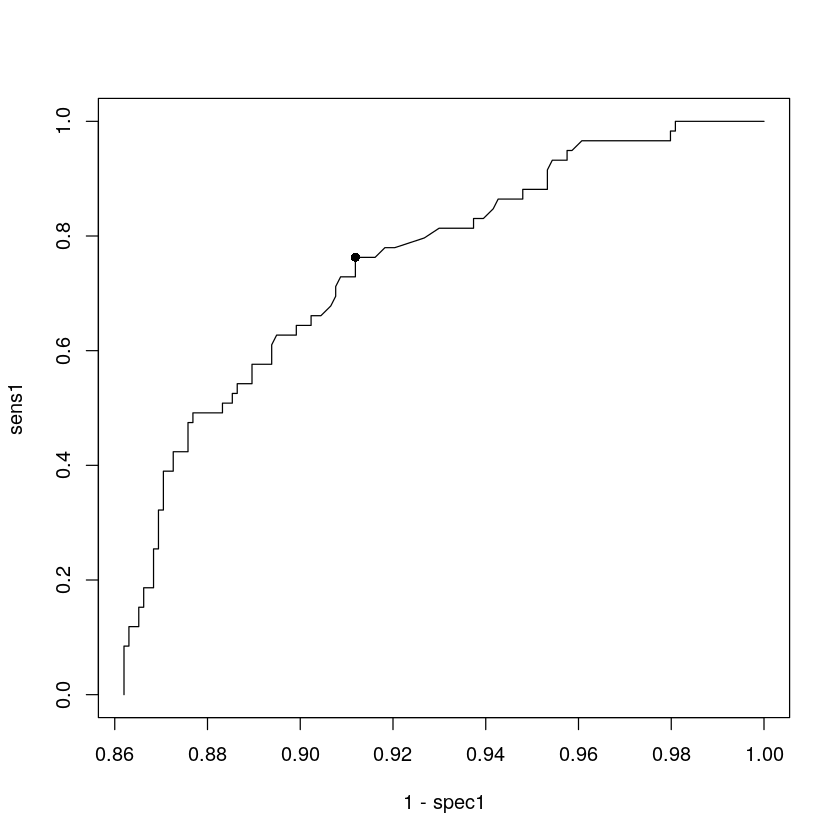

In [41]:
plot(1-spec1, sens1, type="l")
points(1-spec1[which.min(dist1)], sens1[which.min(dist1)], pch=16)

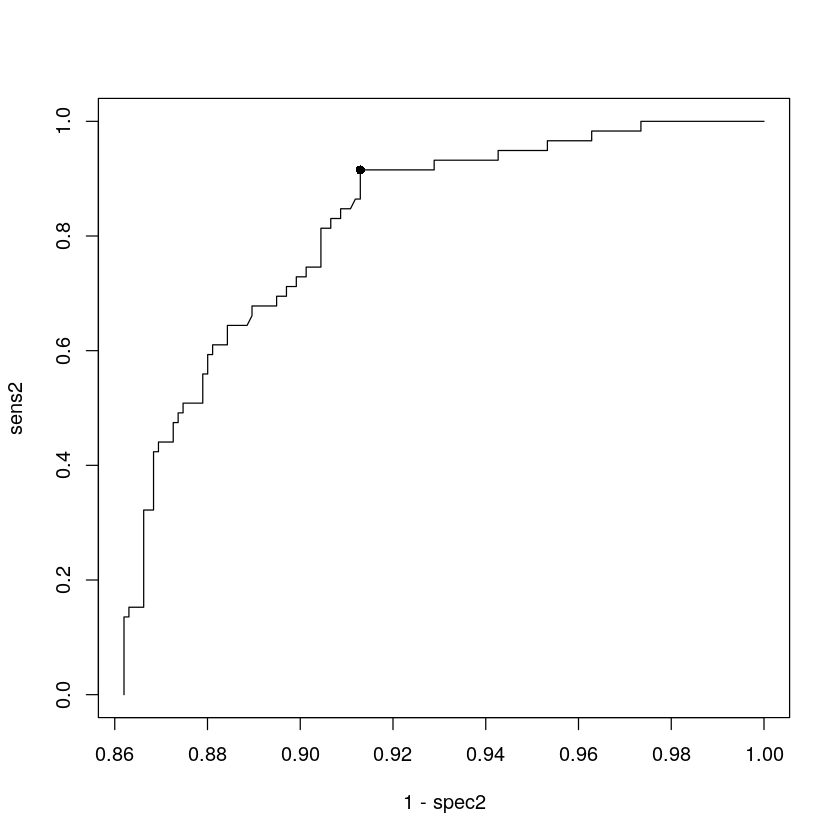

In [42]:
plot(1-spec2, sens2, type="l")
points(1-spec2[which.min(dist2)], sens2[which.min(dist2)], pch=16)

In [43]:
# How can we integrate under the curve 

In [44]:
# Quiz Nov 19
# Review log reg
# model buildling, interactions, threshold choosing
# Logistic regression has other variations like conditional logreg
# Its used when people with and without the disease are matched on
# variables that are important but not of primary interest of the study
# Age, gender, race
# Good and bad - good bc u can no longer blame age race or gender for being responsible for differences in the outcome variable of interest because the people youre working on have the exact same values
# Thats a different way to control variables
# You analyze them slightly differently when theyre matched 
# The likelyhood function is different, interp of coefs is same
# This is not as popular any more. They believe that
# Just include them as covariates in the model, thats how you adjust for the effect
# Problem for matching - its hard to match
# ALso when you match usually some people are unmatched so you have to toss them out which leaves a bad taste in your mouth which seems like a waste of information
# PEOPLE DONT MATCH MUCH ANY MORE SO WE WONT TLAK ABOUT IT 

# The last one of the generalized linear model family: Possion regression

